In [23]:
class MatchReview:
    def __init__(self, si, ai):
        self.si = si # coach analysis duration
        self.ai = ai # helper analysis duration

    def __str__(self):
        return str(self.si) + ", " + str(self.ai)
    
    def __lt__(self, otherReview):
        return(self.ai > otherReview.ai or (self.ai == otherReview.ai and self.si < otherReview.si))
    
    def __eq__(self, otherReview):
        return (self.ai == otherReview.ai and self.si == otherReview.si)


def read_reviews_file(filename):
    review_list = []
    with open(filename, "r") as file:
        for line in file:
            si, ai = line.split(",")
            
            if not si.strip().isdigit() or not ai.strip().isdigit():
                continue 
            
            mr = MatchReview(int(si), int(ai))
            review_list.append(mr)

    return review_list

def sort_reviews(review_list):
    return sorted(review_list)

def full_review_time(sorted_reviews):
    curr_si = 0
    curr_ai = 0

    for review in sorted_reviews:
        curr_si += review.si
        curr_ai = max(curr_ai, curr_si + review.ai)

    return curr_ai

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800, 1

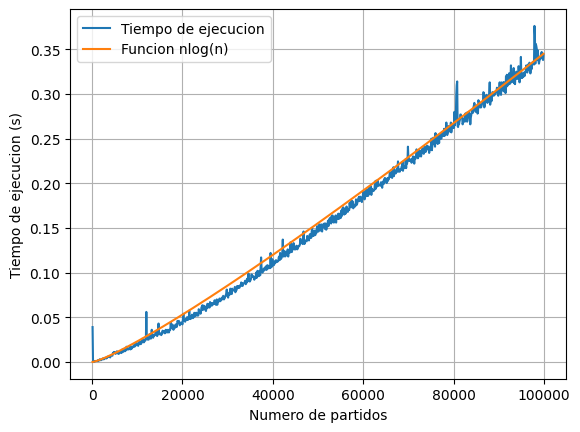

In [35]:
# Medicion del tiempo total del algoritmo

import time
import math

cases = 1000
times = []
x = []
for i in range(cases):
    if i == 0:
        continue
    else:
        filename = f"./testcases/testcase_{str(i * 100)}.txt"
        review_list = read_reviews_file(filename)
        
        start_time = time.time()
        sorted_list = sort_reviews(review_list)
        full_review_time(sorted_list)
        end_time = time.time()
        
        x.append(i * 100)
        times.append(end_time - start_time)

print(x)
print(times)

# Generate nlogn array with 1000 elements
n = []
nlogn = []
for i in range(cases):
    if i == 0:
        continue
    n.append(i * 100)
    nlogn.append(i*math.log(i)/20000)

print(nlogn)

import matplotlib.pyplot as plt

plt.plot(x, times)
plt.plot(n, nlogn)
plt.xlabel("Numero de partidos")
plt.ylabel("Tiempo de ejecucion (s)")
plt.legend(["Tiempo de ejecucion", "Funcion nlog(n)"])
plt.grid()
plt.show()

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800, 1

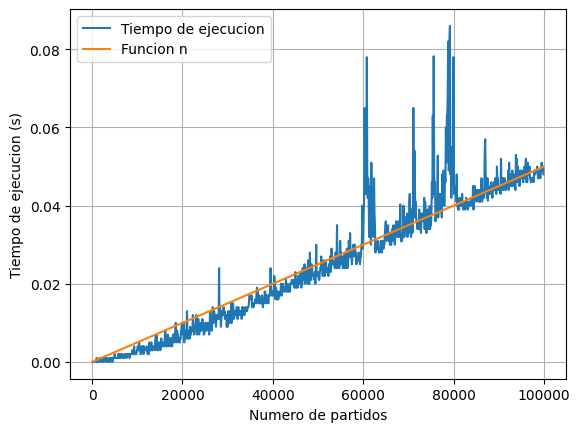

In [34]:
# Medir el tiempo sin el sort de las reviews

import time

cases = 1000
times = []
x = []
for i in range(cases):
    if i == 0:
        continue
    else:
        filename = f"./testcases/testcase_{str(i * 100)}.txt"
        review_list = read_reviews_file(filename)
        
        sorted_list = sort_reviews(review_list)
        start_time = time.time()
        full_review_time(sorted_list)
        end_time = time.time()
        
        x.append(i * 100)
        times.append(end_time - start_time)

print(x)
print(times)

# Generate nlogn array with case elements
n = []
nlogn = []
for i in range(cases):
    if i == 0:
        continue
    n.append(i * 100)
    nlogn.append(i* 0.00005)

print(nlogn)

import matplotlib.pyplot as plt

plt.plot(x, times)
plt.plot(n, nlogn)
plt.xlabel("Numero de partidos")
plt.ylabel("Tiempo de ejecucion (s)")
plt.legend(["Tiempo de ejecucion", "Funcion n"])
plt.grid()
plt.show()